Importing all libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
np.random.seed(0)


Defining mix of different normal distributions

In [5]:
def mix_normal(m1, s1, m2, s2, w1, w2):
  #Generate points on x axis for plotting
  x = np.linspace(-5,10,1000)

  #Calculate the individual normal distributions
  n1 = norm.pdf(x,m1,s1)
  n2 = norm.pdf(x,m2,s2)

  #Calculate the mixture of the normal distributions
  mixture = w1 * n1 + w2 * n2

  #Plotting the results
  plt.plot(x,n1,label = 'Normal distribution 1', linestyle='--')
  plt.plot(x,n2,label='Normal distribution 2', linestyle='--')
  plt.plot(x,mixture,label='Mixture model',color='black')
  plt.xlabel('$x$')
  plt.ylabel('$p(x)$')
  plt.legend()


Implementing the mixture of normal distributions

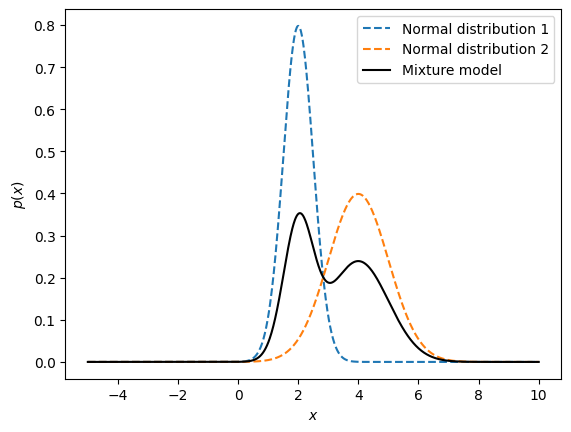

In [8]:
#Parameters for the univariate normal distributions
m1 = 2
s1 = 0.5
m2 = 4
s2 = 1
w1,w2 = 0.4,0.6

mix_normal(m1,s1,m2,s2,w1,w2)